<a href="https://colab.research.google.com/github/OVP2023/CV/blob/main/DZ_CV1_ver_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision.models.detection import ssd300_vgg16, SSD300_VGG16_Weights
from torchvision.models.detection.ssd import SSDClassificationHead
from torchvision.transforms import functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import xml.etree.ElementTree as ET
import torch.optim as optim
from typing import List

In [2]:
import os, sys, random
import xml.etree.ElementTree as ET
from glob import glob
#import pandas as pd
from shutil import copyfile

In [38]:
images=[]
targets=[]

annotations = glob('/content/drive/MyDrive/Datasets/BCCD_Dataset-master/BCCD/Annotations/*.xml')


for file in annotations:
    filename = '/content/drive/MyDrive/Datasets/BCCD_Dataset-master/BCCD/JPEGImages/'+file.split('/')[-1].split('.')[0] + '.jpg'

    boxes = []
    labels = []


    img = Image.open(filename).convert("RGB")
    images.append(img)


    parsedXML = ET.parse(file)
    for node in parsedXML.getroot().iter('object'):
        # Получение класса
        class_name = node.find('name').text
        if class_name == "RBC": label = 1
        elif class_name == "WBC": label = 2
        else: label = 0  # Platelets

        # Получение координат bounding box
        xmin = int(node.find('bndbox/xmin').text)
        xmax = int(node.find('bndbox/xmax').text)
        ymin = int(node.find('bndbox/ymin').text)
        ymax = int(node.find('bndbox/ymax').text)

        boxes.append([xmin, ymin, xmax, ymax])
        labels.append(label)
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels

    targets.append(target)

In [28]:
print(len(targets))

364


In [15]:
print(len(images))

364


In [16]:
print(len(annotations))

364


In [49]:
def visualize_prediction(image, boxes, labels, scores=None, threshold=0.5):
    fig, ax = plt.subplots(1, figsize=(12, 8))
    #image = image.permute(1, 2, 0).cpu().numpy()
    ax.imshow(image)

    for i in range(len(boxes)):
        if scores is not None and scores[i] < threshold:
            continue

        box = boxes[i]
        label = labels[i]
        xmin, ymin, xmax, ymax = box

        # Денормализация координат
        #height, width = image.shape[:2]
        xmin = xmin #* width
        ymin = ymin #* height
        xmax = xmax #* width
        ymax = ymax #* height

        rect = patches.Rectangle(
            (xmin, ymin),
            xmax - xmin,
            ymax - ymin,
            linewidth=2,
            edgecolor='r',
            facecolor='none'
        )
        ax.add_patch(rect)


        if label == 1: class_name == "RBC"
        elif label == 2: class_name == "WBC"
        else: class_name == "Platelets"
        print(label)
        plt.text(xmin, ymin - 10, f"{class_name} ", color='red', fontsize=12)

    plt.axis('off')
    plt.show()



1
1
1
1
1
1
1
1
1
1
0
2


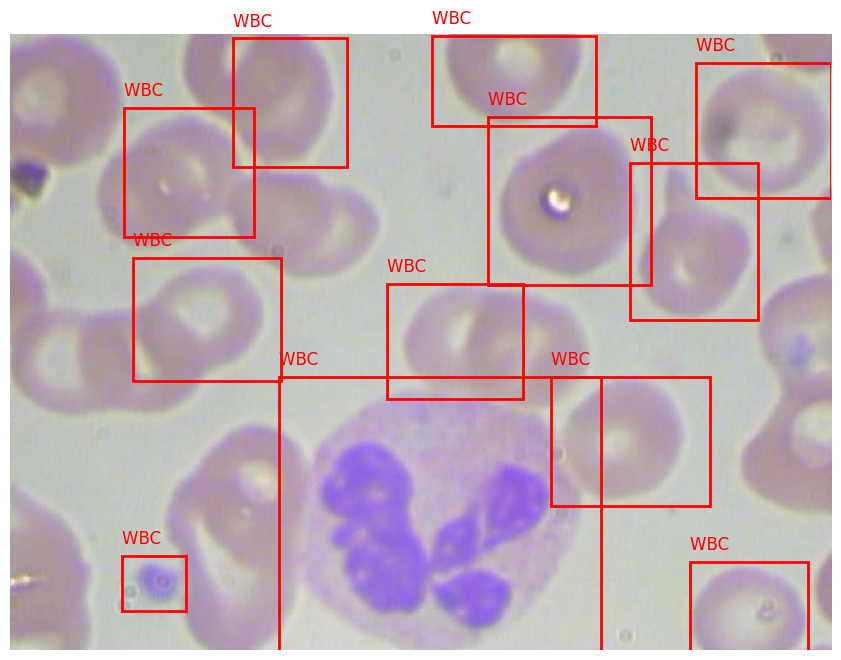

In [50]:
visualize_prediction(images[5],targets[5]["boxes"],targets[5]["labels"], scores=None, threshold=0.5)